In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 

In [1]:
def GenerateRandomPoint(R):
    w = np.random.rand()
    v = np.random.rand()
    r = R*(w**(1/3))
    theta = np.random.uniform(0,2*np.pi)
    phi = np.arccos(2*v-1)
    return r,theta,phi

In [2]:
def GenerateSphere(R,N):
    X = np.zeros(N)
    Y = np.zeros_like(X)
    Z = np.zeros_like(X)
    for i in range(N):
        r,theta,phi = GenerateRandomPoint(R)
        X[i] = r*np.sin(phi)*np.cos(theta)
        Y[i] = r*np.sin(phi)*np.sin(theta)
        Z[i] = r*np.cos(phi)
    return X,Y,Z

In [51]:
X,Y,Z = GenerateSphere(1,10000)

In [6]:
def Integrate(X,Y,Z,f):
    func = np.array([])
    for i in tqdm(range(len(X))):
        func = np.append(func,f(X[i],Y[i],Z[i]))
    return np.average(func)*(4/3)*np.pi

In [7]:
def function(x,y,z):
    return np.exp(np.sqrt(x**2+y**2+z**2))

In [52]:
Integrate(X,Y,Z,function)

100%|██████████| 10000/10000 [00:00<00:00, 75389.94it/s]


9.029717490246007

In [57]:
print(4*np.pi*(np.e-2))

9.02619566197592


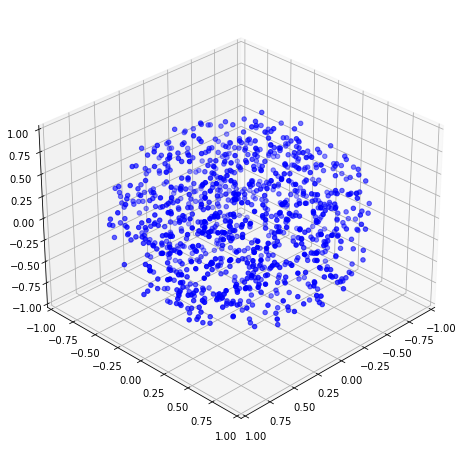

In [50]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection = '3d')

#configurar límites de los ejes
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

ax.view_init(30, 45)

ax.scatter(X,Y,Z,color='b')